# In-Class Assignment: Simulating Superbugs using agent-based modeling
# Day 8
# CMSE 202

<img src="https://sites.psu.edu/siowfa16/files/2016/10/Screen-Shot-2016-10-18-at-12.50.26-AM-1egeuzd.png" width=400px>
<p style="text-align: right;">Image from: https://sites.psu.edu/siowfa16/2016/10/18/what-are-superbugs/comment-page-1/</p>

### <p style="text-align: right;"> &#9989; **Andrew Carras** </p>
#### <p style="text-align: right;"> &#9989; Tate, Trevor</p>

## Learning Goals:

By the end of this assignment you should have:
* Become more comfortable with writing a custom class from scratch
* Practiced using stub functions to sketch out the methods needed by a new class
* Designed a plan for implementing an agent-based model to simulate bacteria evolution
    * **Note**: Design decisions early on can have a large impact on the final outcome.  Try to make design decisions that are flexible. Do not be afraid to refactor your code (i.e. start over with the design). 

## Agenda

1. [Pre-class assignment review and discussion](#pca-review)
1. [Problem Description (simulating bacteria evolution)](#problem)
1. [Building code stubs for your model (using classes and methods)](#code-stubs)
1. Preview Visualization

## Assignment instructions

Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

### Agenda for today's class

</p>

1. Review Pre-class Assignment


---
<a id="pca-review"></a>
# 1. Pre-class assignment review and discussion

Did anyone have any specific issues with the pre-class assignment?

Let's take a moment to highlight some key concepts. **Discuss with your group** the following prompts and write down a some brief notes from your discussion.

&#9989; **Question 1:** What data structures did you think you might need to simulate the petri-dish experiment? What would these data structures be used to represent or keep track of?

<font size=+3>&#9998;</font> A 2D array to store bacteria and antibiotic. Possibly dictionaries for the amounts of each

&#9989; **Question 2:** What classes did you think you would need to define and what were some of the methods you came up with?

<font size=+3>&#9998;</font> A class for the petri dish, it would have methods to set the amount of antibiotic and set the size

----
<a id="problem"></a>
# 2. Problem Description (simulating bacteria evolution)

In this assignment we are going to start to build an agent based model to simulate the evolution of bacteria to become resistant to antibiotics.   If you need to refresh your memory, re-watch the following video that was in your pre-class assignment.  Our goal is to build a simulation that reconstructs this real world experiment. 

Here's the link to the original article as well: http://www.the-scientist.com/?articles.view/articleNo/46993/title/Giant-Petri-Dish-Displays-Evolution-in-Space-and-Time/

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("yybsSqcB7mE",width=640,height=360)

To make this ABM work we would like you to build a system with the following assumptions.

1. Assume a random rectangular petri dish of ```N``` locations wide and ```M``` locations tall (e.g. 90 x 45).
1. Assume that each location on the board is given three (3) different types of antibiotics which each can have continuous values from min to max (e.g. 0 to 1).
1. Assume that bacteria on the board do not move. 
1. Assume each bacteria has a genome sequence of three genes of continuous number (e.g. 0 to 1) that provide immunity to the antibiotics. Each gene will correspond to one of the antibiotic elements deposited on the petri dish
1. Assume that at each iteration of the simulation each bacteria can randomly copy itself once to a random neighboring empty cell (up, down, left, or right). 
1. Assume that during the copy there is a chance of mutating each gene (randomly selecting a new value between zero and one) by some mutation rate (e.g. 20%). 
1. Assume that a bacteria will "die" if the value of it's gene does not contain resistance to any one of the three antibacteria. For example, if the gene is a number less than the value of it's corresponding antibiotic it will die.

**NOTE:** Assumptions are very important.  Make sure you document any major changes, clarifications or deviations from the above.  Instead of asking your instructor for clarification, try looking at the end goal (simulate the petri dish experiment) and make your own clarification. There are many right answers.  

&#9989; **Question 3:** What additional assumptions do you think you need to make for this project?  Do you need to modify or add to any of the above assumptions to make the problem more tractable?

<font size=+3>&#9998;</font> 

**Consider the following example simulation as one possible solution to this problem:**

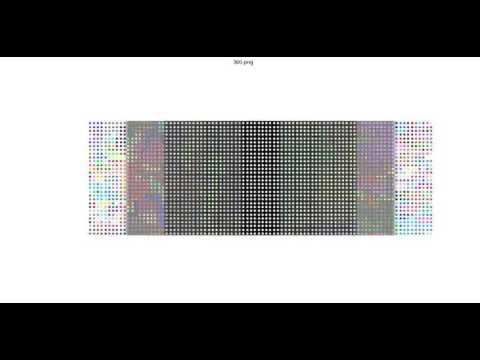

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("p_wGHmNYE_0",width=800,height=450)

This video was created with the following settings:

* The bugs were initialized in the first and last column of the petri dish with randomly generated bacteria 
* Equal amounts of all three antibiotics in 9 different bins using the following pattern:  
    | 0.0 | 0.50 | 0.75 | 0.80 | 0.95 | 0.80 | 0.75 | 0.5 | 0.0 |
* The cells copied with a mutation rate of 20% (i.e. there is a 20% chance each gene will randomly mutate during each copy).


----
<a id="code-stubs"></a>
# 3. Building code stubs for your model (using classes and methods)

**&#9989; Do This:** **As a group**, decide on what classes and functions that will be needed for the simulation and create stub functions for your classes.  Focus on the inputs, outputs and data types, but don't worry about trying to code up all of your methods yet! You just need the stub functions. 

Here are some hints:
- you can use the `pass` keyword to create an empty class or an empty method. However, in creating an empty method you can still specify the input parameters which can be useful
- you might think about some class variables, values that can be stored and utilized by all instances

In [ ]:
# Put your stub functions here
class Petri_Dish:
    
    def __init__(self, N, M, bins):
        pass

----
# 4.  Initialize and draw your "world" for the model (i.e. the petri dish and initial bacteria)

Lets start filling in the stub functions by focusing on the **visualization**. Try considering the following:

* Use colors to indicate the level of antibiotics in the petri dish. Since there are three antibiotics you can use the Red, Green and Blue Channels to indicate the amount of each of the three antibiotics. The `imshow` function can process a 2D array of RGB values.
* Use colors to differentiate the types of the bugs. Since there are three genes for each bug, you can use the Red, Green and Blue color channels to differentiate them. The `scatter` function can take in a list of RGB values to color a point.

You should come up with a method (or couple of methods) in your class (or classes) to draw the petri dish and the bugs. Should bug be able to draw themselves on the petri dish given their location? Or should the petri dish handling all of the drawing given a list of bugs? You get to choose how to do this!

**&#9989; Do This:** Try to implement some of your stub functions to initialize the problem and see if you can come up with a method to visualize the starting state. See if you can create a board that looks similar to the following:
<div align="center"><img src="https://i.ibb.co/gwwg9rC/example-dish.png" alt="example-dish" border="0", width=800></div>


In [413]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from IPython.display import display, clear_output

In [414]:
class Bacteria:
    
    def __init__(self, r, c, sequence, mutation_rate):
        self.r = r
        self.c = c
        self.sequence = sequence
        self.mutation_rate = mutation_rate
        
    def get_sequence(self):
        return self.sequence
    def get_mutation_rate(self):
        return self.mutation_rate
    def get_r(self):
        return self.r
    def get_c(self):
        return self.c

  
                

In [449]:
# Put your code here
class Petri_Dish:
    
    def __init__(self, N, M):
        
        self.N = N #Columns
        self.M = M #Row
        
        self.antibiotic_grid = np.zeros([M,N], dtype=list) #matrix of lists to keep track of all 3 antibiotic vals in each position
        self.bacteria_grid = np.zeros([M,N], dtype=Bacteria)#matrix of Bacteria objects, filled with 0s to start
        self.bact_to_draw = {} #Keeps track of bacteria that need to be drawn to screen
        self.rgb = [np.zeros([M,N]),np.zeros([M,N]),np.zeros([M,N])] # list of 2D arrays for RGB values
        self.bact_count = 0 #Count of bacteria, displays on top of image
        self.cycles = 0 #How many times updated
            
        self.setup_bacteria(mutation_rate=.2)
        self.setup_dish()  
        #Construct an image using float rgb values       
        self.image = np.dstack((self.rgb[0], self.rgb[1], self.rgb[2])).astype(np.float32)
        
        self.fig = plt.figure(figsize=(10,10))
    
    def setup_bacteria(self, mutation_rate=.2):
        #Creates the bacteria on each end
        for r in range(self.bacteria_grid.shape[0]):
            first_genes = [0, 0, 0]
            last_genes = [0, 0, 0]
            #Create 3 random values for the gene sequence
            for i in range(len(first_genes)):
                first_genes[i] = random.uniform(0,1)
                last_genes[i] = random.uniform(0,1)
                
            #Set first and last column to Bacteria objects with random gene sequence and .2 mutation_rate
            first_bact = Bacteria(r, 0, first_genes, mutation_rate)
            last_bact = Bacteria(r, self.N-1, last_genes, mutation_rate)
            self.bact_count+=2
            
            self.bacteria_grid[r][0] = first_bact
            self.bacteria_grid[r][self.N-1] = last_bact
            
            self.bact_to_draw[(r,0)]=first_bact
            self.bact_to_draw[r,self.N-1]=last_bact
            
    def setup_dish(self):
        for r, c in np.ndindex(self.antibiotic_grid.shape):    
            if c <= 9 or (c >= 80 and c <= 89): 
                self.antibiotic_grid[r][c] = [0, 0, 0]
            elif c <= 19 or (c >= 70 and c <= 79):
                self.antibiotic_grid[r][c] = [.5,.5,.5]
            elif c <= 29 or (c >= 60 and c <= 69):
                self.antibiotic_grid[r][c] = [.75,.75,.75]
            elif c <= 39 or (c >= 50 and c <= 59):
                self.antibiotic_grid[r][c] = [.8,.8,.8]
            elif c >= 40 and c <= 49:
                self.antibiotic_grid[r][c] = [.9,.9,.9]
                    
            for i in self.rgb:
                i[r][c] = 1-self.antibiotic_grid[r][c][0] # Sets the colors of the rgb matrix by the antibioitc values
    def get_fig(self):
        return self.fig
    def draw(self):
        
        plt.imshow(self.image) 
        xy_vals = [[],[]]
        colors = [] 
        
        for pos, bact in self.bact_to_draw.items():
            sequence = bact.get_sequence()
            bacteria_rgb = (sequence[0],sequence[1],sequence[2])
            xy_vals[0].append(pos[1])
            xy_vals[1].append(pos[0])
            colors.append((bacteria_rgb))
            
        plt.scatter(xy_vals[0],xy_vals[1], marker="o", s=10, color=colors)     
        plt.title("Bacteria count:"+str(self.bact_count)+ " Cycle #"+str(self.cycles))
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
        
        
        
    def onGrid(self, r,c,grid):
        if r <= grid.shape[0]-1 and r >= 0 and c <= grid.shape[1]-1 and c >= 0:
            return True
        else:
            return False
    
    # Returns neighboring indicies as a tuple (row, column)
    def getNeighborIndecies(self, r,c, grid):
        neighborhood = [(r-1, c), (r, c-1), (r+1, c), (r, c+1)]
    
        neighbor_indecies = []
        for neighbor in neighborhood:
            r, c = neighbor
            if onGrid(r, c, grid):
                neighbor_indecies.append((r,c))
            else:
                pass
    
        return neighbor_indecies
    
    def update(self):
        self.cycles +=1
        
        for pos, bact in self.bact_to_draw.items():
            self.bacteria_grid[(pos[0],pos[1])] = bact
            
        for r, c in np.ndindex(self.bacteria_grid.shape):
            if (type(self.bacteria_grid[r][c]) == Bacteria):
 
                neighbors = self.getNeighborIndecies(r, c, self.bacteria_grid)
                
                target_cell = random.choice(neighbors)
                if target_cell in self.bact_to_draw.keys():
                    continue
                
                bacteria = self.bacteria_grid[r][c]
                mutation_rate = bacteria.get_mutation_rate()
                
                copy_sequence = np.copy(bacteria.get_sequence())
                target_r = target_cell[0]
                target_c = target_cell[1]
                mutate_chance = random.uniform(0,1)
                    
                if mutate_chance <= mutation_rate:
                    for b in range(len(bacteria.get_sequence())):
                        copy_sequence[b] = random.uniform(0,1)
                            
                dead = False
                
                for a in range(len(self.antibiotic_grid[target_r][target_c])):
                    if (self.antibiotic_grid[target_r][target_c][a] >= copy_sequence[a]):
                        dead = True
                        break
                if (not dead):
                    copy = Bacteria(target_r, target_c, copy_sequence, bacteria.get_mutation_rate())
                    self.bact_to_draw[(target_r,target_c)] = copy
                    self.bact_count+=1
        
                    
    def get_bact_count(self):
        return self.bact_count
    def isFinished(self):
        if (self.bact_count >= (self.N*self.M)):
            clear_output(wait=True)
            self.fig.clear()
            print("Petri dish filled after",self.cycles, "cycles")
            self.draw()
            return True
        

Petri dish filled after 761 cycles


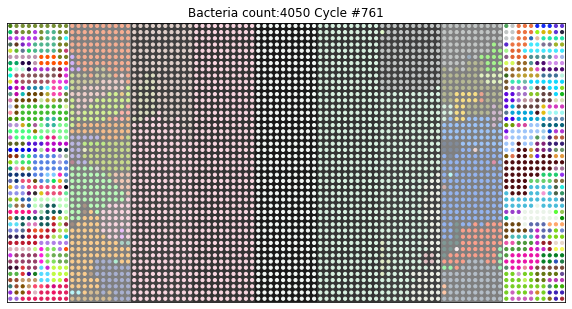

In [450]:
dish = Petri_Dish(90, 45)

while not dish.isFinished():
    dish.draw()
    clear_output(wait=True) 
    display(dish.get_fig())  
    dish.get_fig().clear()  
    time.sleep(0.00001)
    dish.update()






----

In [31]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2021, Department of Computational Mathematics, Science and Engineering at Michigan State University